In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
df_amazon = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [35]:
df_amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
category_table = df_amazon['category'].value_counts()
category_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Las 5 categorias con mas productos son: Sports & Outdoors, beauty, Handmade Clothing, Shoes & Accesories y Bath & Body.

In [14]:
top5 = category_table.head(5)
top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_18244\3551295114.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette="Set3");


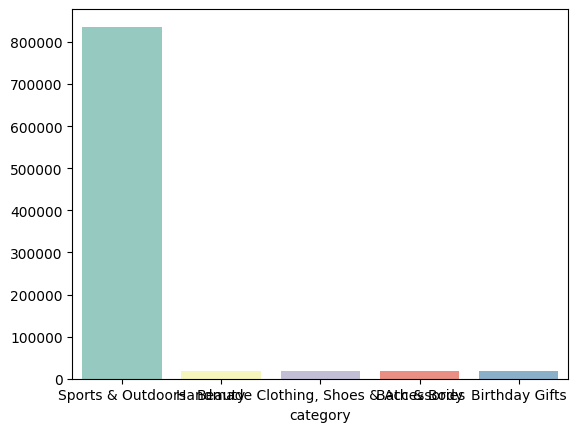

In [15]:
sns.barplot(x=top5.index, y=top5.values, palette="Set3");

<Axes: ylabel='count'>

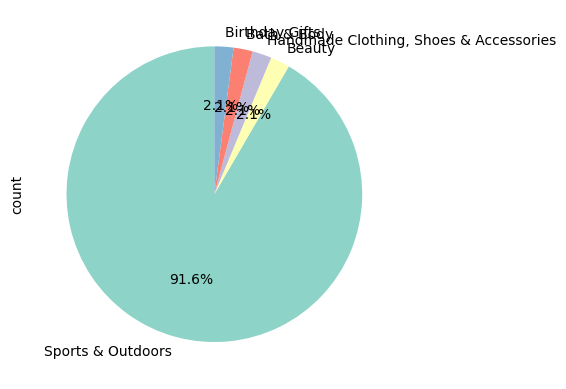

In [21]:
top5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Podemos afirmar que la categoria Sports & Outdorrs domina ampliamente la cantidad de productos. 

In [29]:
mean_price = df_amazon['price'].mean()
median_price = df_amazon['price'].median()
mode_price = df_amazon['price'].mode()[0]

mean_price, median_price, mode_price, 

(np.float64(89.24380943923661), np.float64(19.09), np.float64(9.99))

El precio promedio son 89,24 y el precio mode es 9,99 lo que quiere decir es que hay una gran cantidad de productos por encima de los 80..

In [28]:
variance_price = df_amazon['price'].var()
std_dev_price = df_amazon['price'].std()
min_price = df_amazon['price'].min()
max_price = df_amazon['price'].max()
range_price = max_price - min_price
quantiles_price = df_amazon["price"].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, range_price, quantiles_price

(np.float64(119445.48532254901),
 np.float64(345.60886175349873),
 np.float64(100000.0),
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

Podemos decir que hay una variacion muy grande de valores por lo que hay una dispercion muy grande de los precios con respecto a la media, lo cual tambien confirmamos con el valor de la desviacion estandar. El range alcanza los 100.000, un valor extremadamente alto en comparación con el resto de los datos. Por ultimo, con respecto a los cuartiles podemos observar que el 50% de los precios se ubican entre los 10 y los 19. 

<Axes: xlabel='price', ylabel='Count'>

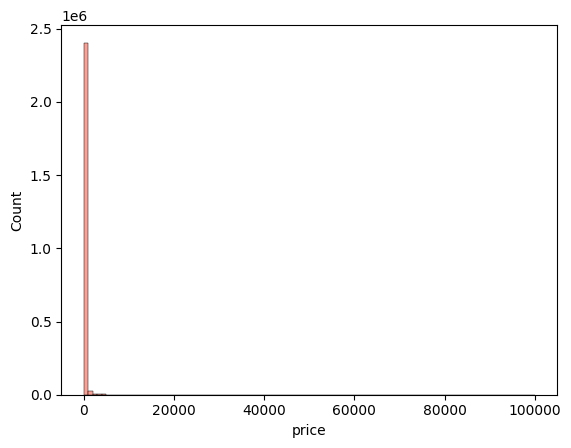

In [34]:
sns.histplot(df_amazon["price"], kde=False, bins=100, color="salmon")

Podemos determinar donde se concentran la mayoria de los productos a partir de los resultados los quartiles. El histograma no es legible por la disperción de precios que hay, lo que hace que este totalmente hacia la izquierda y a su vez los precios mayores a la media esten casi indetectables. Una solucion seria hacer el histograma limitando los precios o bien dandole etiquetas para los luego generarlo sobre esta nueva columna. 

In [36]:
mean_rating = df_amazon['stars'].mean()
median_rating = df_amazon['stars'].median()
mode_rating = df_amazon['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(np.float64(2.152836472966066), np.float64(0.0), np.float64(0.0))

La mayoria de los clientes no califica o califica con 0 estrellas. 

In [40]:
variance_rating = df_amazon['stars'].var()
std_dev_rating = df_amazon['stars'].std()
min_rating = df_amazon['stars'].min()
max_rating = df_amazon['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df_amazon["stars"].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, range_rating, quantiles_rating

(np.float64(4.817434029796864),
 np.float64(2.194865378513421),
 np.float64(5.0),
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

Hay una gran variacion ya que el 50% de los ratings son 0.

In [41]:
skewness_rating = df_amazon['stars'].skew()
kurtosis_rating = df_amazon['stars'].kurtosis()

skewness_rating, kurtosis_rating

(np.float64(0.08120735761080881), np.float64(-1.9260061280432994))

los valores se distribuyen de forma simetrica lo que nos permite afirmar, segun el resultado, que no hay valores ni muy altos ni muy bajos. 

<Axes: xlabel='stars', ylabel='Count'>

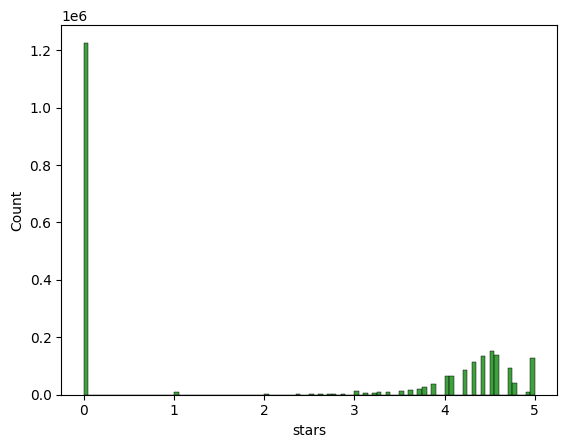

In [42]:
sns.histplot(df_amazon["stars"], kde=False, bins=100, color="green")

Como hemos comentado anteriormente, en el histograma podemos observar que el rating que el mas "elegido" es el 0. 